In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [ ]:
seed=1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
batch_size = 64
learning_rate = 0.1

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [ ]:
train_trans = transforms.Compose(
    [
     transforms.RandomResizedCrop((224,224)),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean, std)
    ]
)

val_trans = transforms.Compose(
    [
     transforms.Resize((224,224)),
     transforms.CenterCrop((224, 224)),
     transforms.RandomVerticalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean, std)
    ]
)

In [ ]:
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/dataset/hymenoptera_data/train',
                                 transform=train_trans
                                 )

val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/dataset/hymenoptera_data/val',
                                 transform=val_trans
                                 )

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

val_loader = DataLoader(dataset=val_dataset,
                        batch_size=batch_size,
                        shuffle=False)

In [ ]:
class VGG_16 (nn.Module):

    def __init__(self, num_classes):
        super(VGG_16, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=64,
                               kernel_size=(3,3),
                               stride=(1,1),
                               padding=(1,1))

        self.conv1_2nd = nn.Conv2d(in_channels=64,
                              out_channels=64,
                              kernel_size=(3, 3),
                              stride=(1, 1),
                              padding=(1, 1))

        self.pool = nn.MaxPool2d(kernel_size=(2,2),
                                 stride=(2,2))

        self.conv2 = nn.Conv2d(in_channels=64,
                               out_channels=128,
                               kernel_size=(3, 3),
                               stride=(1, 1),
                               padding=(1,1))

        self.conv2_2nd = nn.Conv2d(in_channels=128,
                              out_channels=128,
                              kernel_size=(3, 3),
                              stride=(1, 1),
                              padding=(1, 1))

        self.conv3 = nn.Conv2d(in_channels=128,
                               out_channels=256,
                               kernel_size=(3, 3),
                               stride=(1, 1),
                               padding=(1, 1)
                               )

        self.conv3_2nd = nn.Conv2d(in_channels=256,
                              out_channels=256,
                              kernel_size=(3, 3),
                              stride=(1, 1),
                              padding=(1, 1)
                              )

        self.conv4 = nn.Conv2d(in_channels=256,
                               out_channels=512,
                               kernel_size=(3, 3),
                               stride=(1, 1),
                               padding=(1, 1)
                               )

        self.conv4_2nd = nn.Conv2d(in_channels=512,
                              out_channels=512,
                              kernel_size=(3, 3),
                              stride=(1, 1),
                              padding=(1, 1)
                              )

        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(in_features=512*7*7,
                             out_features=4096)

        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

        # self.softmax = nn.Softmax()

    def forward(self, X):

        input_layer = self.relu(self.conv1(X))
        out = self.relu(self.conv1_2nd(input_layer))
        out = self.pool(out)

        out = self.relu(self.conv2(out))
        out = self.relu(self.conv2_2nd(out))
        out = self.pool(out)

        out = self.relu(self.conv3(out))
        out = self.relu(self.conv3_2nd(out))
        out = self.relu(self.conv3_2nd(out))
        out = self.pool(out)

        out = self.relu(self.conv4(out))
        out = self.relu(self.conv4_2nd(out))
        out = self.relu(self.conv4_2nd(out))
        out = self.pool(out)

        out = self.relu(self.conv4_2nd(out))
        out = self.relu(self.conv4_2nd(out))
        out = self.relu(self.conv4_2nd(out))
        out = self.pool(out)

        out = out.reshape(out.shape[0], -1)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        # out = self.softmax(self.fc3(out))
        out = self.fc3(out)

        return out

In [ ]:
model = VGG_16(num_classes=10)
model = model.to(device)
print(model)

VGG_16(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2nd): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2nd): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2nd): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2nd): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 3
start = time.time()
val_acc_hist = []
train_acc_hist = []
loss_train = []
loss_val = []
best_acc = 0.0

In [ ]:
torch.cuda.empty_cache()

In [ ]:
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [ ]:
for epoch in range(num_epochs):

    model.train()

    running_loss = 0.0
    running_corrects = 0

    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        z_scores = model(images)
        loss = criterion(z_scores, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predictions = torch.max(z_scores, 1)
        running_corrects += torch.sum(predictions == labels)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset)
    print(f'Epoch {epoch+1} / {num_epochs}, '
          f'Train Loss {epoch_loss:.4f}, '
          f'Train Acc {epoch_acc:.4f}')

    train_acc_hist.append(epoch_acc)
    loss_train.append(epoch_loss)

    step_lr_scheduler.step()

    model.eval()

    running_loss = 0.0
    running_corrects = 0

    for idx, (images, labels) in enumerate(val_loader):
        images = images.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            z_scores = model(images)
            loss = criterion(z_scores, labels)

            running_loss += loss.item() * images.size(0)
            _, predictions = torch.max(z_scores, 1)
            running_corrects += torch.sum(predictions == labels)

    epoch_loss_val = running_loss / len(val_dataset)
    epoch_acc_val = running_corrects / len(val_dataset)
    print(f'Epoch {epoch + 1} / {num_epochs}, '
          f'Val Loss {epoch_loss_val:.4f}, '
          f'Val Acc {epoch_acc_val:.4f}')

    val_acc_hist.append(epoch_acc_val)
    loss_val.append(epoch_loss_val)

    if epoch_acc_val > best_acc:
        best_acc = epoch_acc_val

time_elapsed = time.time() - start

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1 / 3, Train Loss 103872590391113756442624.0000, Train Acc 0.4057
Epoch 1 / 3, Val Loss 55872847209274966016.0000, Val Acc 0.4575
Epoch 2 / 3, Train Loss 14729071681187708928.0000, Train Acc 0.5041
Epoch 2 / 3, Val Loss 187758817485323872.0000, Val Acc 0.4575
Epoch 3 / 3, Train Loss 99515501100181472.0000, Train Acc 0.5041
Epoch 3 / 3, Val Loss 1595129394688241.0000, Val Acc 0.4575


In [ ]:
def calculate_time (time_elapsed):
    minutes = time_elapsed // 60
    seconds = time_elapsed % 60
    if minutes > 60:
        hours = minutes // 60
        new_minutes = minutes % 60
        print(f'Training complete in {hours:.0f}h {new_minutes:.0f}m {seconds:.0f}s')
    else:
        print(f'Training complete in {minutes:.0f}m {seconds:.0f}s')

In [ ]:
calculate_time(time_elapsed)

Training complete in 1m 41s


In [ ]:
print(f'Best validation Accuracy: {best_acc:.4f}')

Best validation Accuracy: 0.4575


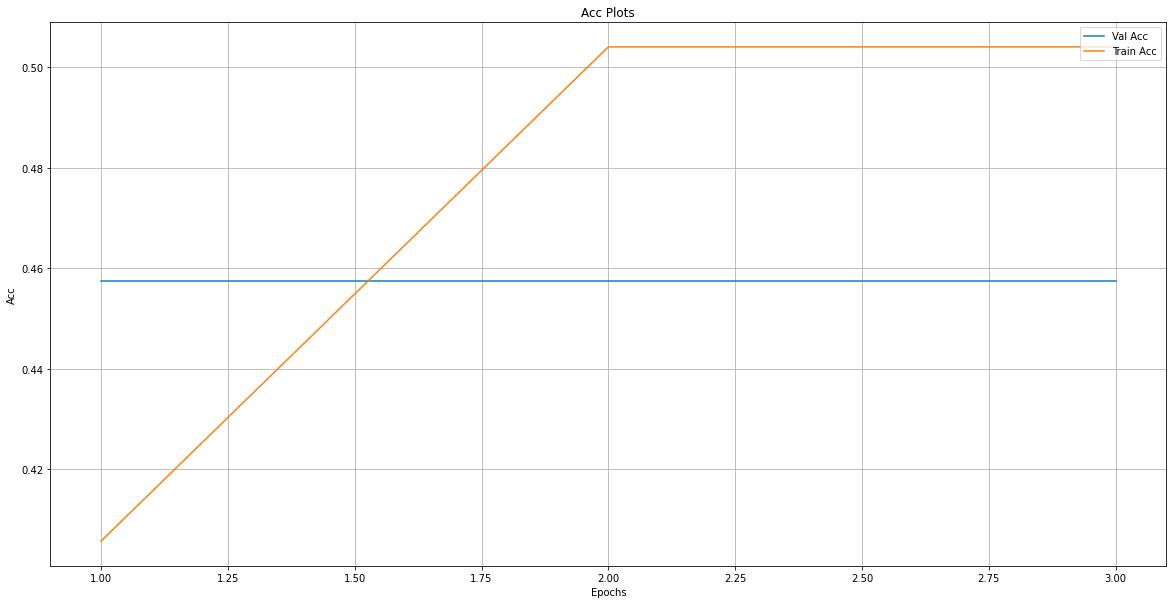

In [ ]:
val_acc_hist_numpy = [acc.cpu().numpy() for acc in val_acc_hist]
train_acc_hist_numpy = [acc.cpu().numpy() for acc in train_acc_hist]
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1, num_epochs+1), val_acc_hist_numpy, label='Val Acc')
plt.plot(range(1, num_epochs+1), train_acc_hist_numpy, label='Train Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title("Acc Plots")
plt.legend(loc='upper right')
plt.show()

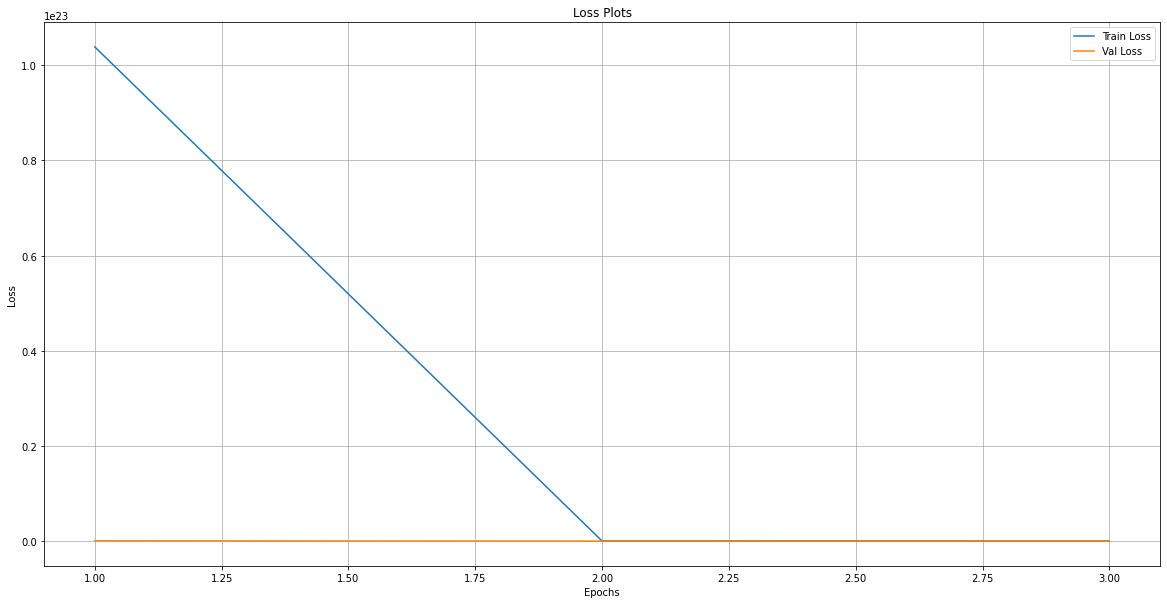

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1, num_epochs+1), loss_train, label='Train Loss')
plt.plot(range(1, num_epochs+1), loss_val, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()